In [1]:
#Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#Loading the csv file
filepath = "creditcard.csv"
dataframe = pd.read_csv(filepath)

# Displaying the first few rows of the DataFrame to check if it loaded successfully
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataframe.shape

(284807, 31)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Displaying summary statistics for numeric columns
summary_stats = dataframe.describe()

# Displaying the number of missing values in each column
missing_values = dataframe.isnull().sum()

# Combining the summary statistics and missing values information into a single DataFrame
info_df = pd.DataFrame({
    "Data Type": dataframe.dtypes,
    "Non-Null Count":dataframe.count(),
    "Missing Values": missing_values,
    "Mean": summary_stats.loc["mean"],
    "Min": summary_stats.loc["min"],
    "Max": summary_stats.loc["max"]
})

print(info_df)

       Data Type  Non-Null Count  Missing Values          Mean         Min  \
Time     float64          284807               0  9.481386e+04    0.000000   
V1       float64          284807               0  1.168375e-15  -56.407510   
V2       float64          284807               0  3.416908e-16  -72.715728   
V3       float64          284807               0 -1.379537e-15  -48.325589   
V4       float64          284807               0  2.074095e-15   -5.683171   
V5       float64          284807               0  9.604066e-16 -113.743307   
V6       float64          284807               0  1.487313e-15  -26.160506   
V7       float64          284807               0 -5.556467e-16  -43.557242   
V8       float64          284807               0  1.213481e-16  -73.216718   
V9       float64          284807               0 -2.406331e-15  -13.434066   
V10      float64          284807               0  2.239053e-15  -24.588262   
V11      float64          284807               0  1.673327e-15  

In [6]:
# Checking for null values in the DataFrame
null_values_exist = dataframe.isnull().sum().any()

print(null_values_exist)

False


In [7]:
# Getting the "Amount" column from the DataFrame
amount_column = dataframe["Amount"]

# Calculating descriptive statistics using numpy functions
amount_count = amount_column.count()
amount_mean = np.mean(amount_column)
amount_std = np.std(amount_column)
amount_min = np.min(amount_column)
amount_25th_percentile = np.percentile(amount_column, 25)
amount_median = np.median(amount_column)
amount_75th_percentile = np.percentile(amount_column, 75)
amount_max = np.max(amount_column)

# Displaying the descriptive statistics
print("Count:", amount_count)
print("Mean:", amount_mean)
print("Standard Deviation:", amount_std)
print("Minimum:", amount_min)
print("25th Percentile:", amount_25th_percentile)
print("Median (50th Percentile):", amount_median)
print("75th Percentile:", amount_75th_percentile)
print("Maximum:", amount_max)

Count: 284807
Mean: 88.34961925093133
Standard Deviation: 250.11967013523534
Minimum: 0.0
25th Percentile: 5.6
Median (50th Percentile): 22.0
75th Percentile: 77.16499999999999
Maximum: 25691.16


In [8]:
# Using value_counts() to count the occurrences of each class
class_counts = dataframe["Class"].value_counts()

# Getting the number of genuine (non-fraudulent) transactions
non_fraud = class_counts[0]

# Calculating the percentage of fraud transactions
non_fraud_percent = (non_fraud / dataframe.shape[0]) * 100


print("Genuine transactions: ", non_fraud)
print("Percentage of Non Fraud transactions: {:.4f}".format(non_fraud_percent))

Genuine transactions:  284315
Percentage of Fraud transactions: 99.8273


In [9]:
# Getting the number of fraud transactions
fraud = class_counts[1]

# Calculating the percentage of fraud transactions
fraud_percent = (fraud / dataframe.shape[0]) * 100

print("Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


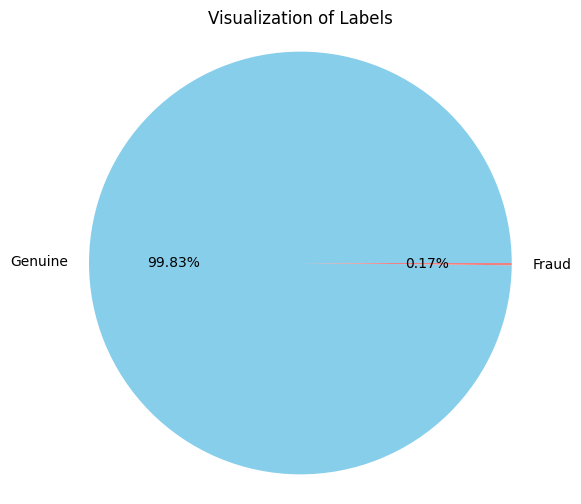

In [10]:
# Creating a pie chart
labels = ["Genuine", "Fraud"]
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.2f%%', colors=['skyblue', 'lightcoral'])
plt.title("Visualization of Labels")
plt.axis('equal')
plt.show()

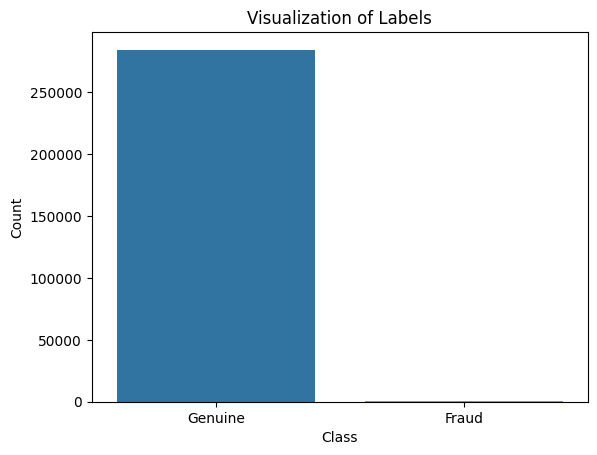

In [11]:
#Creating bar chart
labels = ["Genuine", "Fraud"]
sns.countplot(x="Class", data=dataframe)
plt.title("Visualization of Labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

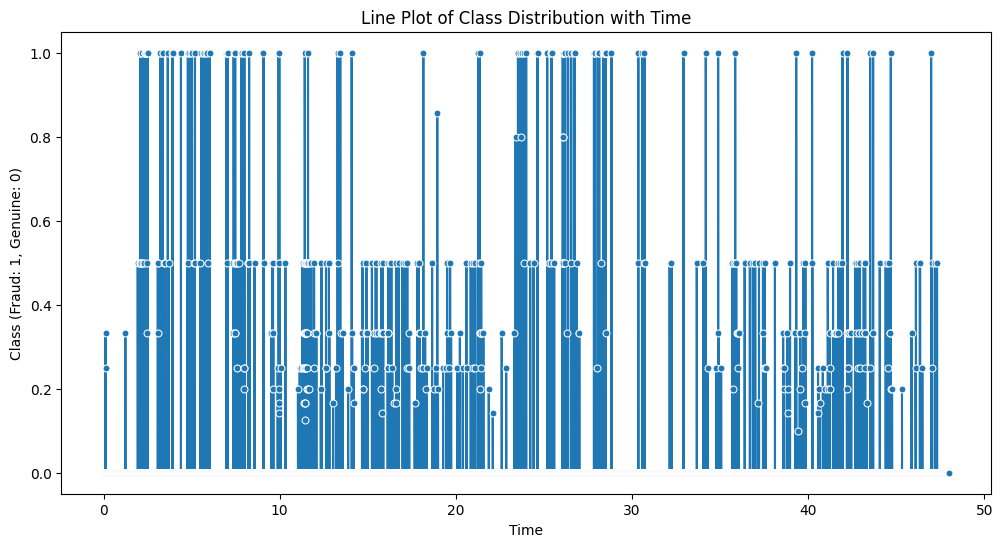

In [12]:

#Converting the 'Time' column to hours for better visualization
dataframe['Time'] = dataframe['Time'] / 3600  


# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Class', data=dataframe, errorbar=None, marker='o', markersize=5)
plt.xlabel('Time')
plt.ylabel('Class (Fraud: 1, Genuine: 0)')
plt.title('Line Plot of Class Distribution with Time')
plt.show()

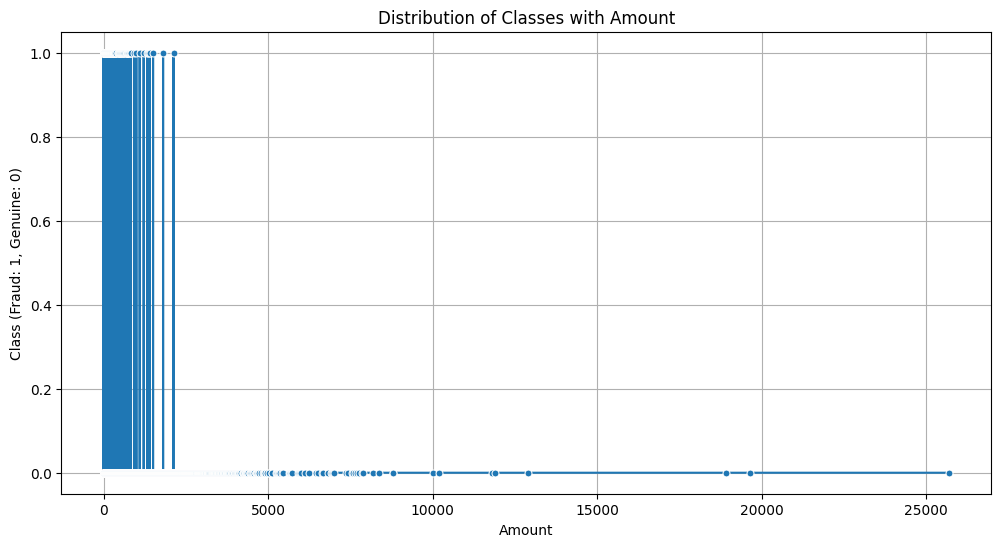

In [13]:
# Creating a line plot to show the distribution of classes with amount
plt.figure(figsize=(12, 6))
sns.lineplot(x='Amount', y='Class', data=dataframe, estimator=None, marker='o', markersize=5)
plt.xlabel('Amount')
plt.ylabel('Class (Fraud: 1, Genuine: 0)')
plt.title('Distribution of Classes with Amount')
plt.grid(True)
plt.show()

In [14]:
dataframe = dataframe.drop('Time', axis=1)

In [15]:
dataframe.shape

(284807, 30)

In [16]:
# Separating the target variable "Class" (Y) and feature variables (X)
y = dataframe["Class"]
X = dataframe.drop(["Class"], axis=1)

In [17]:
y.shape

(284807,)

In [18]:
X.shape

(284807, 29)

In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [20]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.25, random_state = 42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

              V1        V2        V3        V4        V5        V6        V7  \
83225  -1.648591  1.228130  1.370169 -1.735542 -0.029455 -0.484129  0.918645   
52800  -0.234775 -0.493269  1.236728 -2.338793 -1.176733  0.885733 -1.960981   
21293   1.134626 -0.774460 -0.163390 -0.533358 -0.604555 -0.244482 -0.212682   
133600  0.069514  1.017753  1.033117  1.384376  0.223233 -0.310845  0.597287   
38225  -0.199441  0.610092 -0.114437  0.256565  2.290752  4.008475 -0.123530   
...          ...       ...       ...       ...       ...       ...       ...   
119879  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165 -0.165254   
259178 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076 -0.466107   
131932 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198  1.076640   
146867 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695 -0.471769   
121958  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028 -0.502369   

              V8        V9       V10  .

In [21]:
# Perform Scaling
scaler = StandardScaler()
# Fitting the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [22]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83225,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,...,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,-0.196016
52800,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,...,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,-0.107223
21293,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,...,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,0.086696
133600,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,...,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,-0.306794
38225,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,...,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,-0.260020


In [23]:
# Transforming the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.073794
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.681590
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.224939
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.339926
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.342304


In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (213605, 29)
Shape of X_test:  (71202, 29)


In [25]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [26]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion = 'entropy', 
random_state = 0)
dclassifier.fit(X_train, y_train)

# Making predictions on the test set using the Decision Tree model
dpred = dclassifier.predict(X_test)


# Calculating the accuracy score of the Decision Tree model manually
correct_predictions1 = (dpred == y_test).sum()
total_samples = len(y_test)
df_score = (correct_predictions1 / total_samples) * 100
print("Decision tree score : ",df_score)

Decision tree score :  99.91994606893064


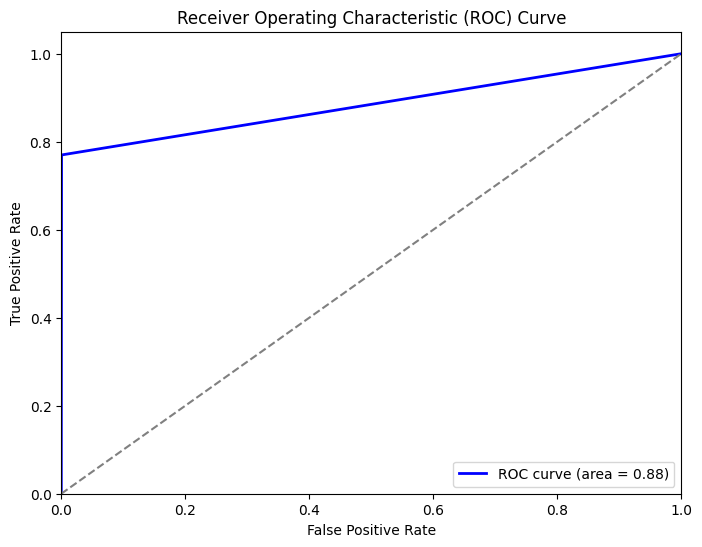

In [27]:
from sklearn.metrics import roc_curve, auc
# Getting the predicted probabilities for the positive class (fraud) from the Decision Tree
y_probs1 = dclassifier.predict_proba(X_test)[:, 1]

# Computing ROC curve and area under the curve (AUC) for ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs1)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initializing the Random Forest Classifier
rclassifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Training the Random Forest Classifier on the training set
rclassifier.fit(X_train, y_train)

# Making predictions on the test set using the Random Forest Classifier
rpred = rclassifier.predict(X_test)

# Calculating the accuracy score of the Random Forest Classifier using scikit-learn function
rf_score = accuracy_score(y_test, rpred) * 100

print("Random Forest Classifier Accuracy:", rf_score)

Random Forest Classifier Accuracy: 99.95786635206876


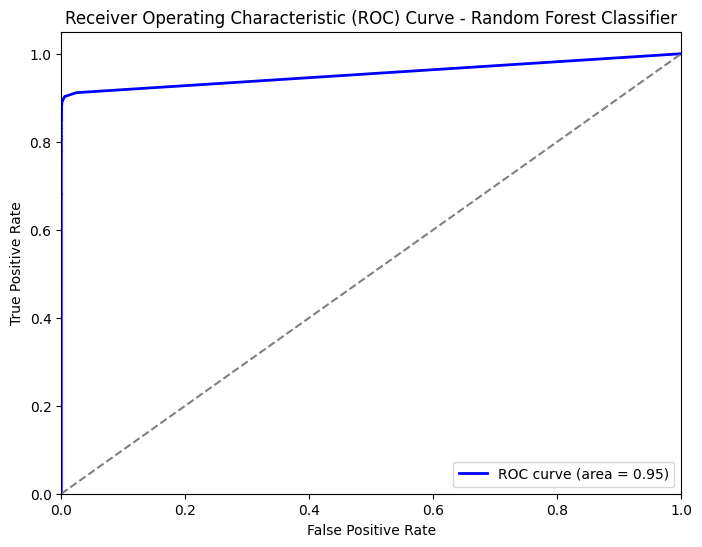

In [38]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class (fraud) from the Random Forest Classifier
y_probs2 = rclassifier.predict_proba(X_test)[:, 1]

# Computing ROC curve and area under the curve (AUC) for ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs2)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC curve for Random Forest Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [39]:
from xgboost import XGBClassifier

# Initializing the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Training the XGBoost Classifier on the training set
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set using the XGBoost Classifier
xgb_pred = xgb_classifier.predict(X_test)

# Calculating the accuracy score of the XGBoost Classifier using scikit-learn function
xgb_score = accuracy_score(y_test, xgb_pred) * 100

print("XGBoost Classifier Accuracy:", xgb_score)


XGBoost Classifier Accuracy: 99.96348417179293


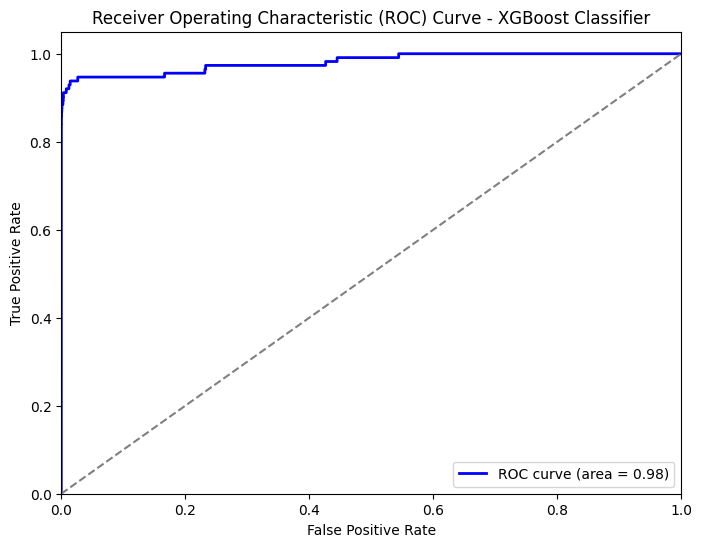

In [40]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class (fraud) from the XGBoost Classifier
y_probs_xgboost = xgb_classifier.predict_proba(X_test)[:, 1]

# Computing ROC curve and area under the curve (AUC) for ROC curve
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_probs_xgboost)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

# Plotting ROC curve for XGBoost Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgboost)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initializing the Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', random_state=0)

# Training the SVM Classifier on the training set
svm_classifier.fit(X_train, y_train)

# Making predictions on the test set using the SVM Classifier
svm_pred = svm_classifier.predict(X_test)

# Calculating the accuracy score of the SVM Classifier using scikit-learn function
svm_score = accuracy_score(y_test, svm_pred) * 100

print("Support Vector Machine Classifier Accuracy:", svm_score)


Support Vector Machine Classifier Accuracy: 99.93118170837899


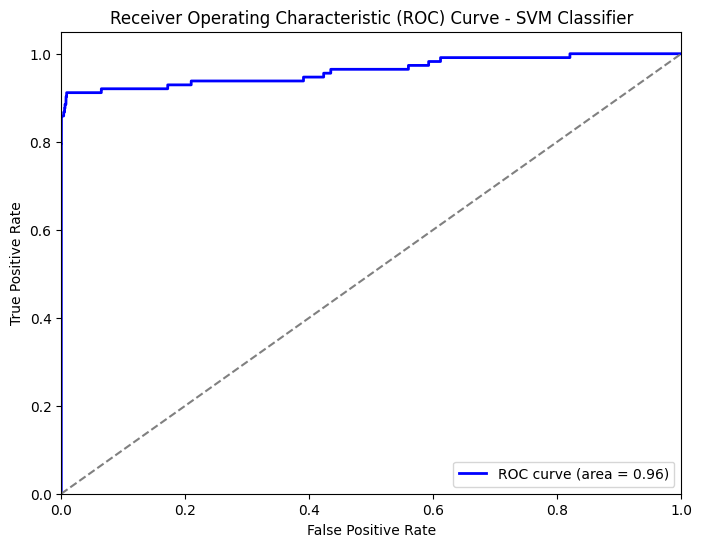

In [42]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class (fraud) from the SVM Classifier
y_probs_svm = svm_classifier.decision_function(X_test)

# Computing ROC curve and area under the curve (AUC) for ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting ROC curve for SVM Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def specificity_score(actuals, predictions):
    # Calculate True Negatives (TN)
    tn = np.sum((actuals == 0) & (predictions == 0))
    
    # Calculate False Positives (FP)
    fp = np.sum((actuals == 0) & (predictions == 1))
    
    # Calculate Specificity (True Negative Rate)
    specificity = tn / (tn + fp)
    return specificity

def metrics(actuals, predictions):
    accuracy = accuracy_score(actuals, predictions)
    precision = precision_score(actuals, predictions)
    recall = recall_score(actuals, predictions)
    f1 = f1_score(actuals, predictions)
    specificity = specificity_score(actuals, predictions)
    
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1-score: {f1:.5f}")
    print(f"Specificity: {specificity:.5f}")


In [44]:
#Evaluation of Decision Tree Model
print("Evaluation of Decision Tree Model")
metrics(y_test, dpred.round())

Evaluation of Decision Tree Model
Accuracy: 0.99920
Precision: 0.73729
Recall: 0.76991
F1-score: 0.75325
Specificity: 0.99956


In [45]:
#Evaluation of Random Forest Model
print("Evaluation of Random Forest Model")
metrics(y_test, rpred.round())

Evaluation of Random Forest Model
Accuracy: 0.99958
Precision: 0.94624
Recall: 0.77876
F1-score: 0.85437
Specificity: 0.99993


In [46]:
#Evaluation of XG Boost Model
print("Evaluation of XG Boost Model")
metrics(y_test, xgb_pred.round())

Evaluation of XG Boost Model
Accuracy: 0.99963
Precision: 0.94845
Recall: 0.81416
F1-score: 0.87619
Specificity: 0.99993


In [47]:
#Evaluation of SVM Model
print("Evaluation of SVM Model")
metrics(y_test, svm_pred.round())

Evaluation of SVM Model
Accuracy: 0.99931
Precision: 0.91026
Recall: 0.62832
F1-score: 0.74346
Specificity: 0.99990


In [49]:
from sklearn.metrics import confusion_matrix
# Creating the confusion matrix for Decision Tree
conf_matrix = confusion_matrix(y_test, dpred)

print("Confusion Matrix for Decision Tree:")
print(conf_matrix)

Confusion Matrix for Decision Tree:
[[71058    31]
 [   26    87]]


In [50]:
# Creating the confusion matrix for Random Forest Classifier
conf_matrix = confusion_matrix(y_test, rpred)

print("Confusion Matrix for Random Forest Classifier:")
print(conf_matrix)

Confusion Matrix for Random Forest Classifier:
[[71084     5]
 [   25    88]]


In [51]:
# Creating the confusion matrix for XGBoost
conf_matrix = confusion_matrix(y_test, xgb_pred)

print("Confusion Matrix for XGBoost:")
print(conf_matrix)

Confusion Matrix for XGBoost:
[[71084     5]
 [   21    92]]


In [52]:
# Creating the confusion matrix for SVM
conf_matrix = confusion_matrix(y_test, svm_pred)

print("Confusion Matrix for SVM:")
print(conf_matrix)

Confusion Matrix for SVM:
[[71082     7]
 [   42    71]]


Comparing the performance metrics, we can conclude that XG Boost performed the best among the four models (Decision Tree, Random Forest, XG Boost, and SVM).


The dataset has class imbalance problem where class imbalance refers to an unequal distribution of classes (categories) in a dataset, particularly in the context of a classification problem. In such cases, one class may have significantly more instances (samples) than the other class(es), leading to an imbalanced dataset. This imbalance can cause issues for machine learning models because they may become biased towards the majority class that is on class 0 and perform poorly on the minority class that is on class 1.

SMOTE (Synthetic Minority Over-sampling Technique) is a popular and effective oversampling technique used to address class imbalance in a dataset. It is specifically designed for handling the imbalance between the majority class and the minority class in classification problems. SMOTE helps to alleviate this issue by creating synthetic samples for the minority class.



In [54]:
from imblearn.over_sampling import SMOTE

# Performing SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the distribution of classes after oversampling
value_counts = Counter(y_resampled)
print("Resampled class distribution:", value_counts)

# Splitting the resampled data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initializing and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(train_X, train_Y)

# Making predictions on the test set
y_pred = xgb_classifier.predict(test_X)

# Evaluating the performance of the XGBoost classifier
accuracy = accuracy_score(test_Y, y_pred)
print("XGBoost Classifier Accuracy:", accuracy)

Resampled class distribution: Counter({0: 284315, 1: 284315})
XGBoost Classifier Accuracy: 0.9998182766766908


In [55]:
# Computing the confusion matrix
conf_matrix = confusion_matrix(test_Y, y_pred)

print("Confusion Matrix for XGBoot after SMOTE Oversampling:")
print(conf_matrix)

Confusion Matrix for XGBoot after SMOTE Oversampling:
[[85118    31]
 [    0 85440]]


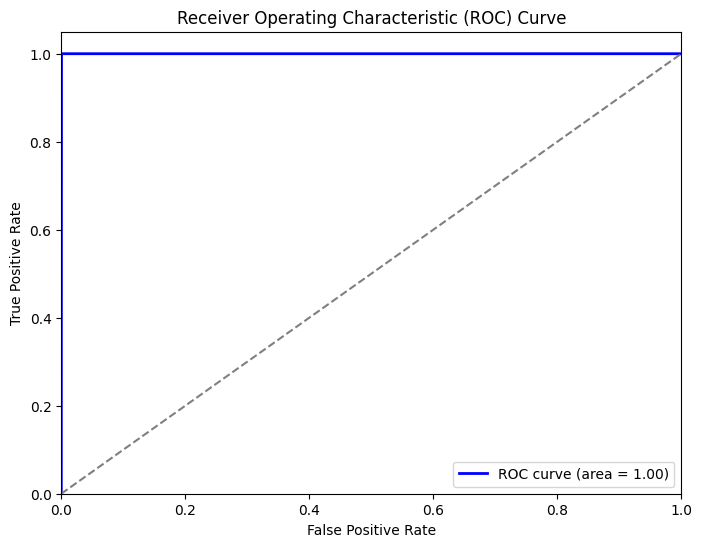

In [56]:
# Computing ROC curve and area under the curve (AUC) for ROC curve
fpr, tpr, thresholds_roc = roc_curve(test_Y, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [57]:
print("Evaluation of XGBoost after SMOTE Oversampling")
metrics(test_Y, y_pred.round())

Evaluation of XGBoost after SMOTE Oversampling
Accuracy: 0.99982
Precision: 0.99964
Recall: 1.00000
F1-score: 0.99982
Specificity: 0.99964
